Exploratory Data Analysis on Netflix Dataset

Author - Chinmay Pote

To start, we need to import the necessary libraries.

We load the Netflix dataset.

In [6]:
netflix = pd.read_csv('netflix_titles.csv')

We begin by checking the dataset’s structure and statistics.

In [ ]:
netflix.info() 
netflix.describe()
netflix.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Checking for Missing Values

In [10]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We fill missing values with appropriate replacements

In [14]:
netflix['director'].fillna('Unknown', inplace=True)
netflix['cast'].fillna('Unknown', inplace=True)
netflix['country'].fillna(netflix['country'].mode()[0], inplace=True)
netflix['rating'].fillna(netflix['rating'].mode()[0], inplace=True)
netflix['duration'].fillna('Unknown', inplace=True)

Distribution of Content Types. (Plot Diagram)

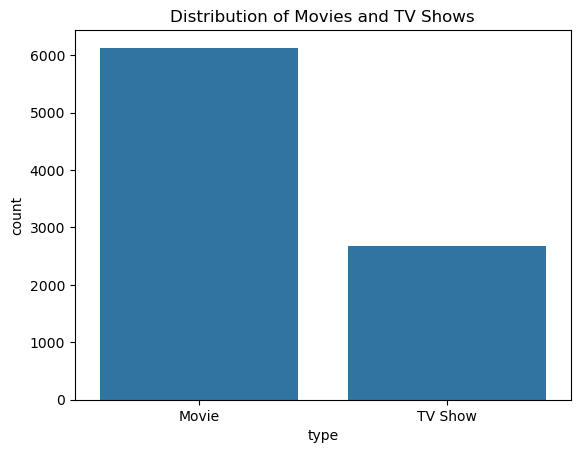

In [16]:
sns.countplot(x='type', data=netflix)
plt.title('Distribution of Movies and TV Shows')
plt.show()

Most Common Ratings. (Plot Diagram)

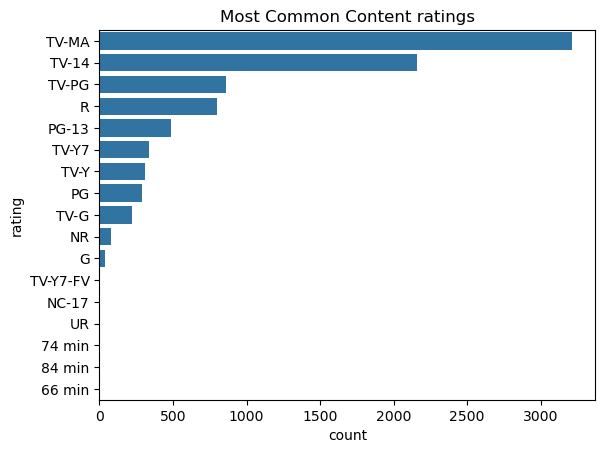

In [18]:
sns.countplot(y=netflix['rating'], order=netflix['rating'].value_counts().index)
plt.title('Most Common Content ratings')
plt.show()

Top 10 Countries Producing Content. (Plot Diagram) 

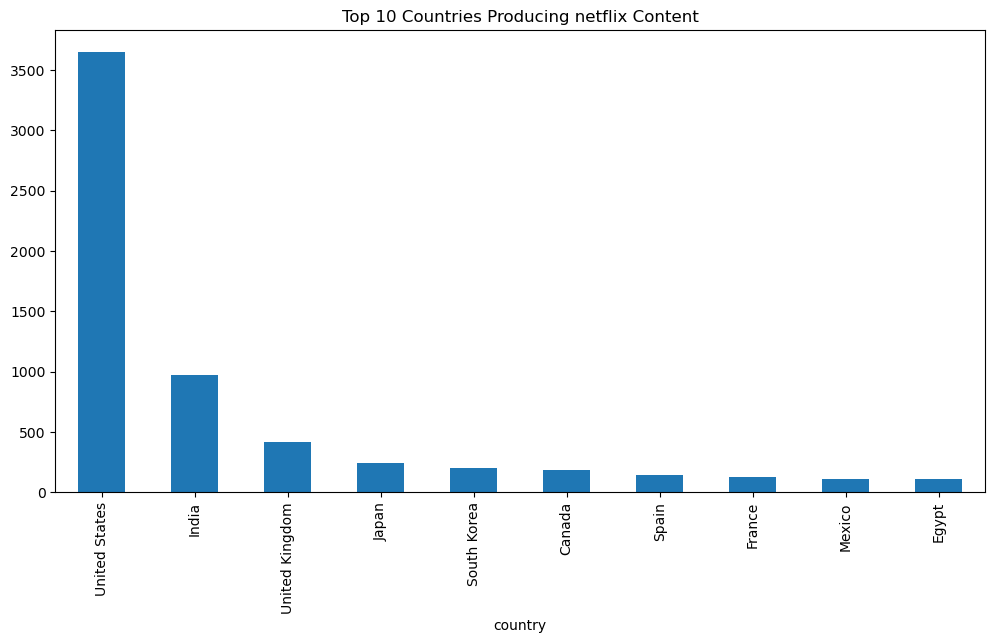

In [22]:
netflix['country'].value_counts().head(10).plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Countries Producing netflix Content')
plt.show()

Release Year vs. Content Type. (Plot Diagram) 

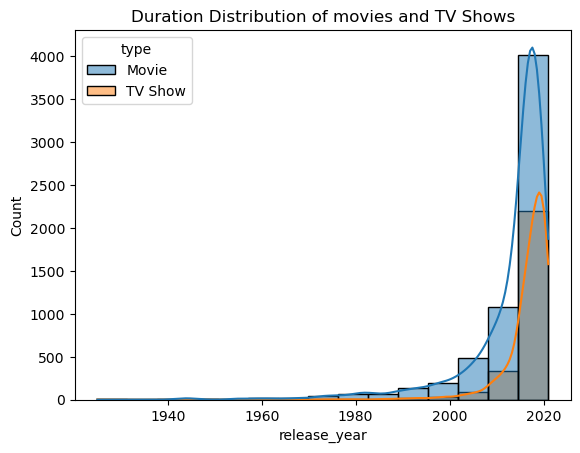

In [28]:
sns.histplot(data=netflix, x='release_year', hue='type', bins=15, kde=True)
plt.title('Duration Distribution of movies and TV Shows')
plt.show()

Duration vs. Content Type. (Plot Diagram) 

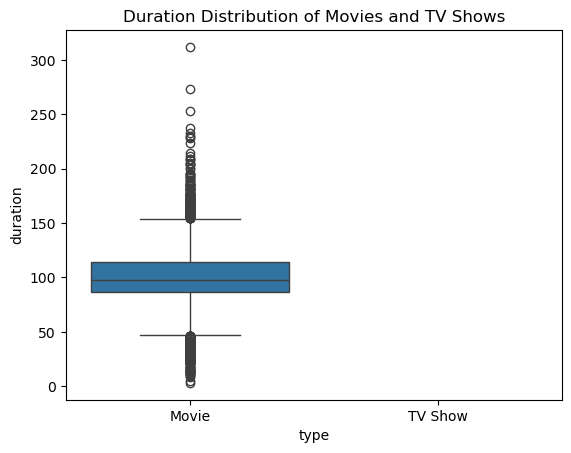

In [30]:
sns.boxplot(x='type', y=pd.to_numeric(netflix['duration'].str.replace(' min', ''), errors='coerce'), data=netflix)
plt.title('Duration Distribution of Movies and TV Shows')
plt.show()

In [ ]:
numeric_data = netflix.select_dtypes(include='number')

Since most of the data is categorical, correlation analysis is limited. However, we can analyze relationships among numerical variables like release year and duration. (Plot Diagram) 

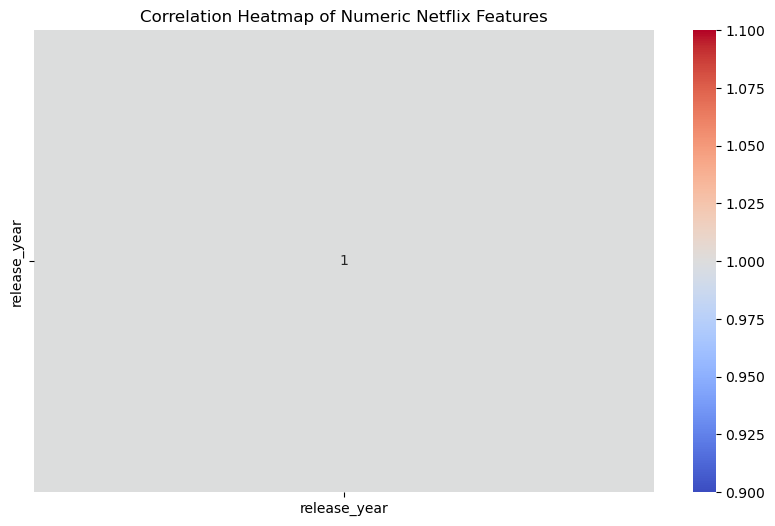

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Netflix Features")
plt.show()

In [ ]:
plt.title("Correlation Heatmap of Numeric Netflix Features")
plt.show()

Extracting First Genre.

In [50]:
netflix['first_genre'] = netflix['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
Encoding Categorical Variables.

In [52]:
netflix = pd.get_dummies(netflix, columns=['first_genre', 'country'], drop_first=True)

Content Addition Trends Over Time. (Plot Diagram) 

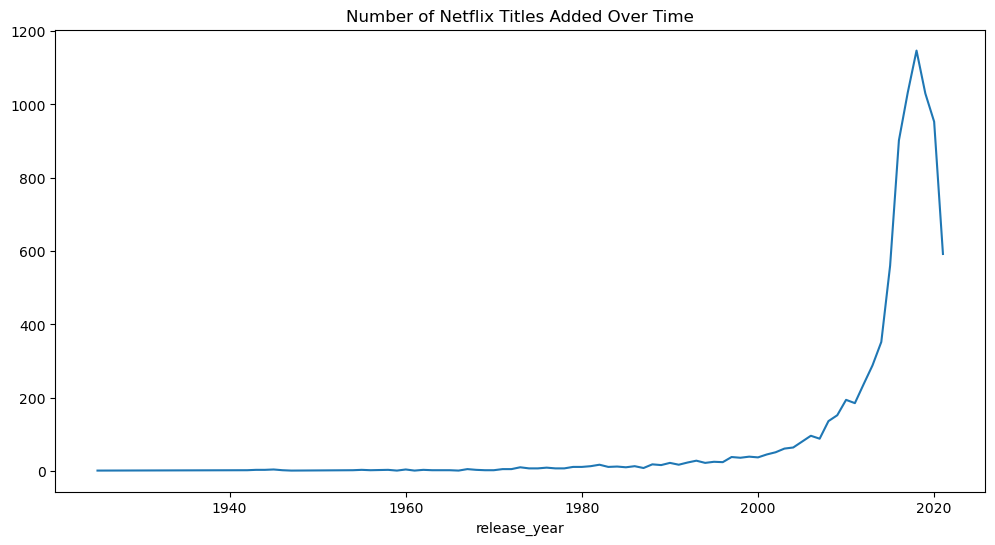

In [54]:
netflix.groupby('release_year').size().plot(kind='line', figsize=(12,6))
plt.title('Number of Netflix Titles Added Over Time')
plt.show()

Top 10 Directors. (Plot Diagram) 

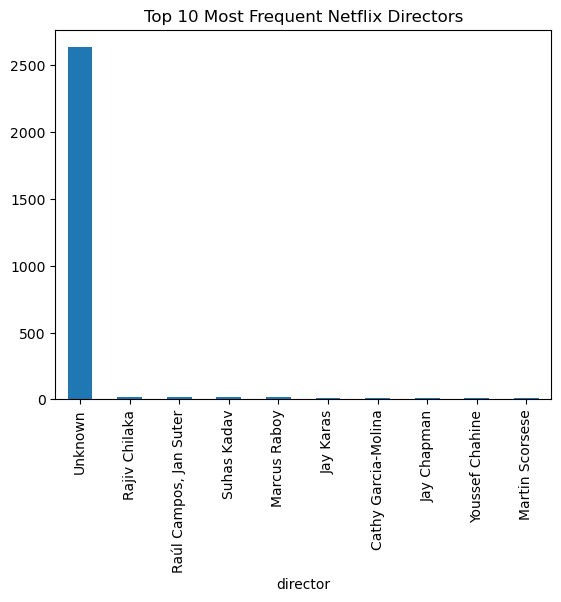

In [56]:
netflix['director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Netflix Directors')
plt.show()